In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np

import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import glob
from tqdm import tqdm
from collections import OrderedDict, defaultdict
from IPython.display import clear_output
import time
import os
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import glob

In [6]:
fn='videos/eating1.mp4'

video=cv2.VideoCapture(fn)
imgs=[]
while(video.isOpened()):
    ret, frame = video.read()
    if ret==False: break
    imgs.append(frame)
video.release() 
len(imgs)

339

In [9]:
def view_imgs_as_video(imgs, delay=0.05):
    for img in imgs:
        clear_output(wait=True)
        plt.imshow(img[:,:,::-1])
        plt.show()
        time.sleep(delay)

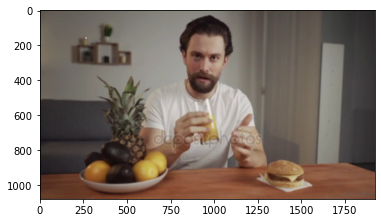

In [10]:
view_imgs_as_video(imgs, delay=0.01)

In [11]:
pose = mp.solutions.pose.Pose(static_image_mode=False, min_detection_confidence=0.5, min_tracking_confidence=0.5)
def extract_keypoints(image_rgb): 
    try:
        results = pose.process(image_rgb)
        landmarks=results.pose_landmarks.landmark
    except Exception as e:
        # print('Error file=', fn)
        # print('Error=', e)
        return None
    xys=[]
    for landmark in landmarks:
        xys.append([landmark.x, landmark.y])
    xys=np.array(xys)
    return xys

In [12]:
action=[]
for img in imgs:
    image_rgb=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    xys=extract_keypoints(image_rgb)
    xys=xys.ravel()

    action.append(xys)
action=np.array(action)
action.shape

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


(339, 66)

In [18]:
def draw_points(image, landmarks, keys=None):
    mp_drawing = mp.solutions.drawing_utils
    drawing_spec = mp_drawing.DrawingSpec(color=(255, 0, 0), thickness=2, circle_radius=4)
 
    if keys==None: keys=[ i for i in range(len(landmarks)) ]
     
    for key in keys:
        landmark_point = landmarks[key]
        x_px, y_px = int(landmark_point.x * image.shape[1]), int(landmark_point.y * image.shape[0])
        cv2.circle(image, (x_px, y_px), drawing_spec.circle_radius, drawing_spec.color, drawing_spec.thickness)
    return image 

In [16]:
pose = mp.solutions.pose.Pose(static_image_mode=False, min_detection_confidence=0.5, min_tracking_confidence=0.5)

results = pose.process(image_rgb)
landmarks=results.pose_landmarks.landmark

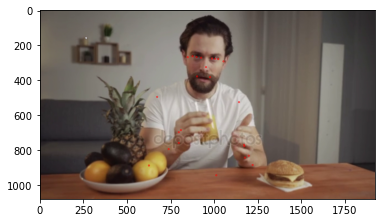

In [22]:
upper_kps=[i for i in range(24)]
image=draw_points(image_rgb.copy(), landmarks, keys=upper_kps)
plt.imshow(image)

In [33]:
imgs_kps=[]
for img in imgs:
    image_rgb=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    results = pose.process(image_rgb)
    landmarks=results.pose_landmarks.landmark
    
    landmarks=landmarks[:25]
    image=draw_points(img.copy(), landmarks, keys=upper_kps)
    imgs_kps.append(image)

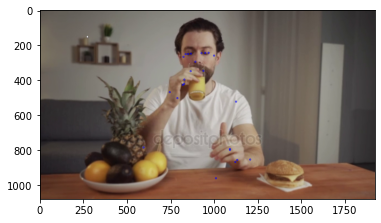

In [34]:
view_imgs_as_video(imgs_kps[:20], delay=0.01)

### load video and save eating /non-eating [start,end] indexes

In [47]:
def extract_imgs(video_fn, skip_frames=1):
    video=cv2.VideoCapture(video_fn)
    imgs=[]
    frame_count=0
    while(video.isOpened()):
        ret, frame = video.read()
        if ret==False: break
        if frame_count%skip_frames==0:
            imgs.append(frame)
        frame_count+=1
    video.release() 
    return imgs

In [291]:
# fn='videos/eating1.mp4'
fn='videos/eating2.mp4'
fn='videos/eating3.mp4'
fn='videos/eating4.mp4'
fn='videos/eating5.mp4'
fn='videos/eating6.mp4'
fn='videos/eating7.mp4'
fn='videos/mango.mp4'
fn='videos/noteating.mp4' #two person
fn='videos/reading1.mp4' 
fn='videos/reading2.mp4'
fn='videos/similar1.mp4'
fn='videos/similar2.mp4'
fn='videos/similar3.mp4'
fn='videos/sitting.mp4'
fn='videos/smartphone.mp4'
fn='videos/eating8.mp4'
fn='videos/talking.mp4'
fn='videos/talking2.mp4' 
skip_frames=5
imgs=extract_imgs(fn, skip_frames=skip_frames)
len(imgs)

151

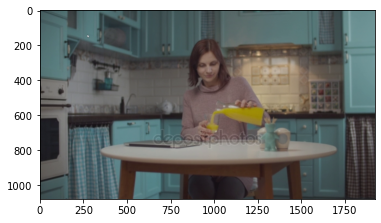

In [292]:
view_imgs_as_video(imgs, delay=0.01)

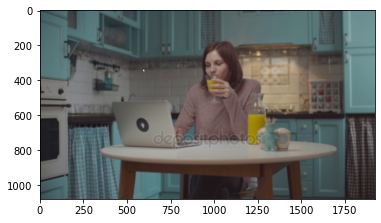

In [285]:
eat_si=105
eat_ei=125
imgs2=imgs[eat_si:eat_ei]
view_imgs_as_video(imgs2, delay=0.01)

In [286]:
eating_info=f'fn={fn}, eating={eat_si*skip_frames},{eat_ei*skip_frames}\n'
print(eating_info)
with open('eating_data_info.txt', 'a+') as f:
    f.write(eating_info)

fn=videos/talking2.mp4, eating=525,625



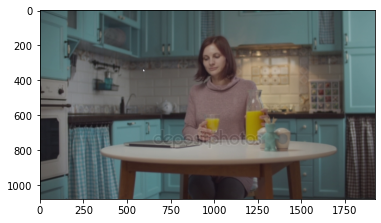

In [287]:
#non-eating
non_eat_si=0
non_eat_ei=30
imgs3=imgs[non_eat_si:non_eat_ei]
view_imgs_as_video(imgs3, delay=0.01)

In [288]:
noneating_info=f'fn={fn}, non-eating={non_eat_si*skip_frames},{non_eat_ei*skip_frames}\n'
print(noneating_info)
with open('eating_data_info.txt', 'a+') as f:
    f.write(noneating_info)

fn=videos/talking2.mp4, non-eating=0,150



In [ ]:
# fn=videos/eating1.mp4, eating=15,115
# fn=videos/eating1.mp4, non-eating=240,340
# fn=videos/eating2.mp4, eating=160,240
# fn=videos/eating2.mp4, non-eating=0,125
# fn=videos/eating3.mp4, eating=25,150
# fn=videos/eating3.mp4, non-eating=175,300
# fn=videos/eating4.mp4, eating=50,150
# fn=videos/eating4.mp4, eating=125,225
# fn=videos/eating4.mp4, non-eating=250,350
# fn=videos/eating4.mp4, eating=390,450
# fn=videos/eating5.mp4, eating=175,250
# fn=videos/eating5.mp4, eating=325,400
# fn=videos/eating5.mp4, eating=450,550
# fn=videos/eating5.mp4, non-eating=550,620
# fn=videos/eating6.mp4, non-eating=0,250
# fn=videos/eating6.mp4, non-eating=250,500
# fn=videos/eating7.mp4, eating=25,100
# fn=videos/eating7.mp4, non-eating=200,340
# fn=videos/mango.mp4, eating=75,175
# fn=videos/reading1.mp4, non-eating=0,200
# fn=videos/reading1.mp4, non-eating=200,445
# fn=videos/reading2.mp4, eating=25,140
# fn=videos/reading2.mp4, non-eating=250,450
# fn=videos/similar1.mp4, eating=0,60
# fn=videos/similar2.mp4, eating=50,160
# fn=videos/similar2.mp4, non-eating=200,450
# fn=videos/similar3.mp4, non-eating=0,150
# fn=videos/similar3.mp4, non-eating=150,290
# fn=videos/sitting.mp4, eating=300,375
# fn=videos/sitting.mp4, non-eating=0,200
# fn=videos/smartphone.mp4, non-eating=0,250
# fn=videos/eating8.mp4, eating=90,165
# fn=videos/eating8.mp4, eating=790,865
# fn=videos/eating8.mp4, eating=1035,1115
# fn=videos/talking.mp4, non-eating=0,150
# fn=videos/talking.mp4, non-eating=150,300
# fn=videos/talking.mp4, non-eating=300,450
# fn=videos/talking2.mp4, eating=525,625
# fn=videos/talking2.mp4, non-eating=0,150